In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
PATH = "../../Datasets/"
sns.set_style("darkgrid")

In [5]:
df = pd.read_csv(PATH + "Complete.csv")
df["Time"] = pd.to_datetime(df["Time"])

In [6]:
morelia = df[df["City"] == "Morelia"]

In [7]:
morelia = morelia.sort_values(by="Time")

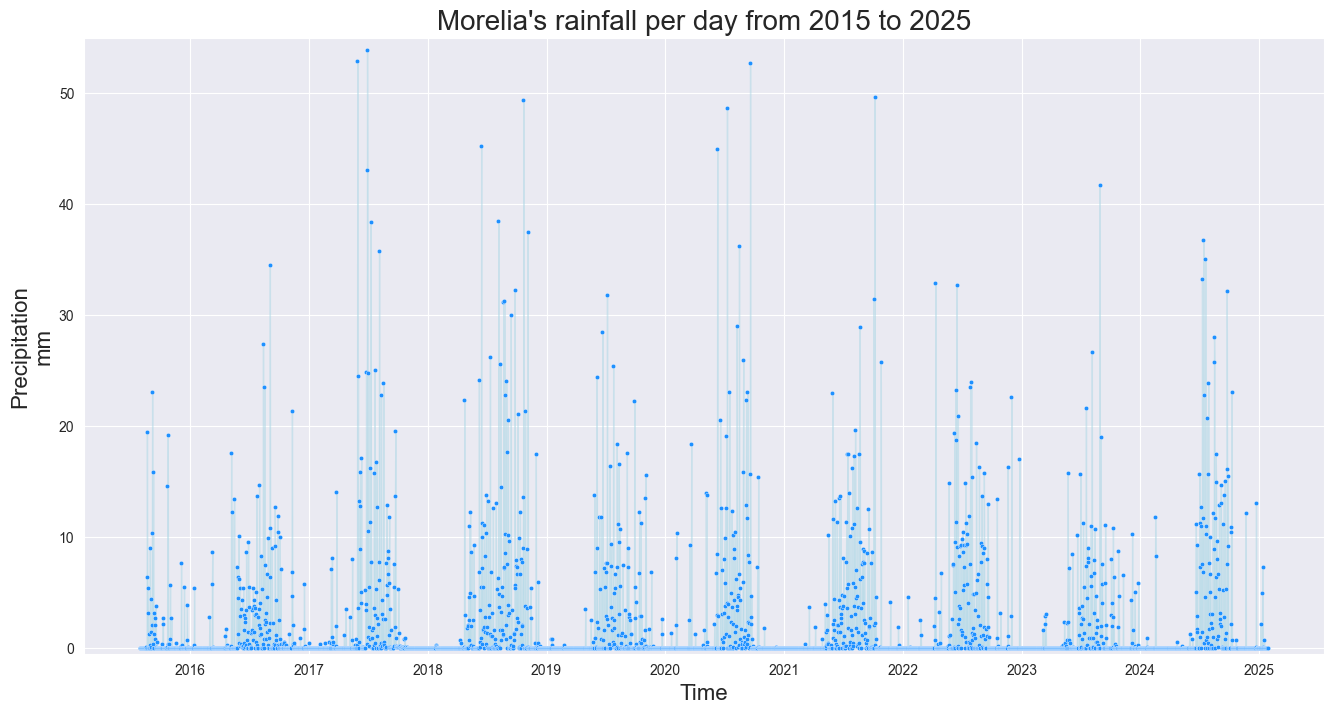

In [8]:
plt.figure(figsize=(16, 8))
plt.fill_between(morelia["Time"], morelia["Rain_Tot"], color="lightblue", alpha=0.5)
sns.scatterplot(x=morelia["Time"], y=morelia["Rain_Tot"], s=10, color="dodgerblue")
plt.ylim(-0.5, 55)
plt.ylabel("Precipitation\nmm", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's rainfall per day from 2015 to 2025", size=20)
plt.show()

In [9]:
def season(date):
    year = date.year
    seasons = {
        'Winter': (pd.Timestamp(f'{year}-12-21'), pd.Timestamp(f'{year+1}-03-19')),
        'Spring': (pd.Timestamp(f'{year}-03-20'), pd.Timestamp(f'{year}-06-20')),
        'Summer': (pd.Timestamp(f'{year}-06-21'), pd.Timestamp(f'{year}-09-22')),
        'Fall':   (pd.Timestamp(f'{year}-09-23'), pd.Timestamp(f'{year}-12-20'))
    }

    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    return 'Winter'  # Casos entre diciembre y marzo del siguiente año

In [10]:
morelia['Season'] = morelia['Time'].apply(season)

In [11]:
morelia["WDir_rad"] = np.radians(morelia["WDir_Avg"])

In [12]:
dfSpring = morelia[morelia["Season"] == "Spring"]
dfSummer = morelia[morelia["Season"] == "Summer"]
dfFall = morelia[morelia["Season"] == "Fall"]
dfWinter = morelia[morelia["Season"] == "Winter"]

In [13]:
seasons_data = {
    "Winter": {"df": dfWinter, "color": "royalblue"},
    "Spring": {"df": dfSpring, "color": "forestgreen"},
    "Summer": {"df": dfSummer, "color": "deeppink"},
    "Fall":   {"df": dfFall, "color": "peru"}
}

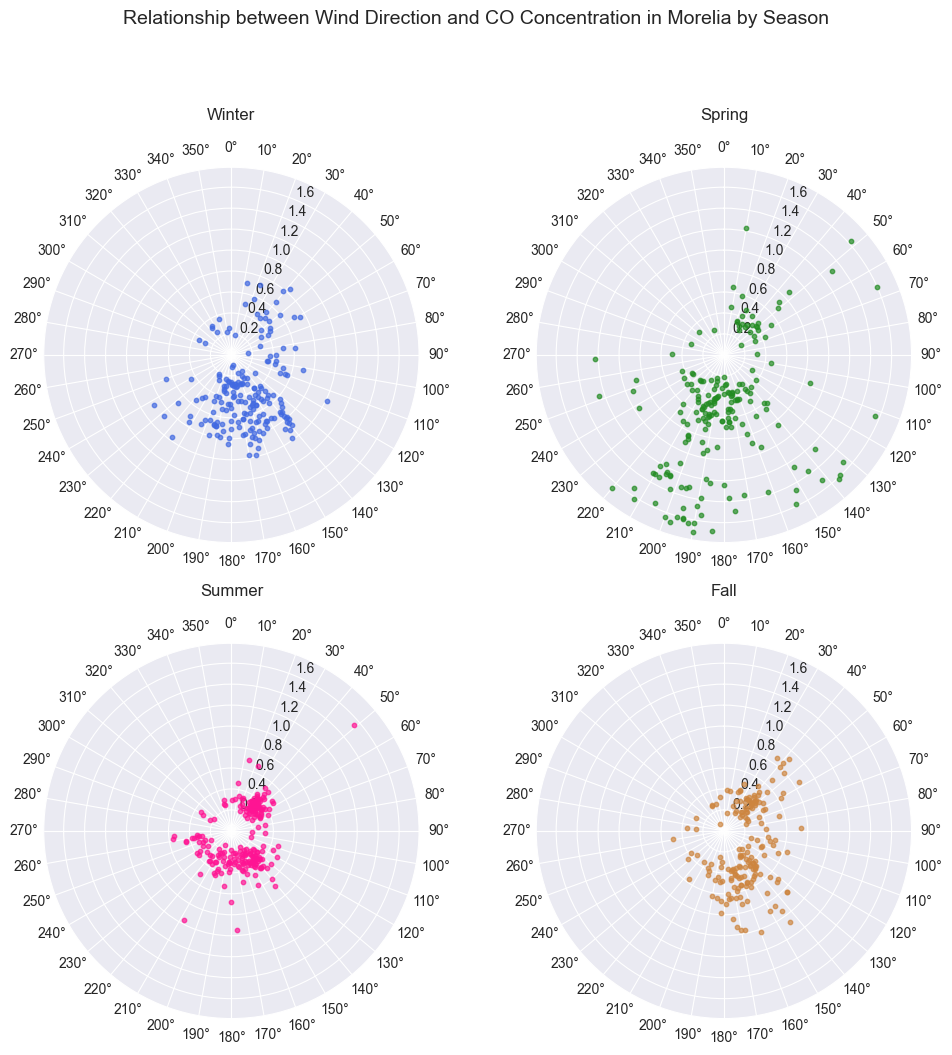

In [16]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and CO Concentration in Morelia by Season", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    df = data["df"]
    color = data["color"]

    ax.scatter(df["WDir_rad"], df["CO"], s=10, color=color, alpha=0.7)
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_title(f"{season}", pad=15, fontsize=12)
    ax.set_ylim(0, 1.79)
    ax.set_xticks(np.radians([x for x in range(0, 360, 10)]))

plt.tight_layout()
plt.show()